In [1]:
!make py

clang++ -O3 -undefined dynamic_lookup -shared -std=c++17 -fPIC `python -m pybind11 --includes` basic_tools.cpp classes.cpp ecosystem_bindings.cpp -o eco.so


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

import time
import sys
sys.path.insert(0, '/Users/JuanLuis/git/Ecosystems/pruebas_cpp/')
import eco
import copy

In [3]:
start = time.time()
e = eco.Ecosystem()
e.initialize()
e.create_new_organisms(eco.OrganismType.PLANT_A, 2000);
e.create_new_organisms(eco.OrganismType.PLANT_B, 2000);
e.create_new_organisms(eco.OrganismType.HERBIVORE, 200);
e.create_new_organisms(eco.OrganismType.CARNIVORE, 200);
print("init time: {:.2f}ms".format(1000 * (time.time() - start)))

init time: 60.61ms


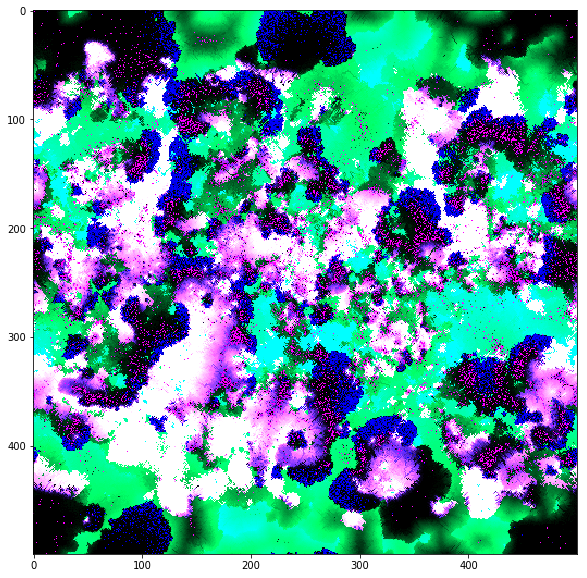

 12%|█▏        | 116161/1000000 [5:57:01<101:54:43,  2.41it/s]

Number of organisms 225413


 12%|█▏        | 116165/1000000 [5:57:02<59:40:25,  4.11it/s]

In [ ]:
num_iters = 1000000
num_organisms = []
periodic_plot = 20
import tqdm
#e.create_new_organisms(eco.OrganismType.PLANT_A, 100);
#e.create_new_organisms(eco.OrganismType.PLANT_B, 100);
#e.create_new_organisms(eco.OrganismType.HERBIVORE, 100);
#e.create_new_organisms(eco.OrganismType.CARNIVORE, 100);

for i in tqdm.tqdm(range(num_iters)):
    start = time.time()
    try:
        e.evolve()
    except KeyboardInterrupt:
        break
    num_organisms.append(e.get_num_organisms())
 
    # ------------------------------------------------------------
    # We have to do this:
    if e.get_num_organisms_of_type(eco.OrganismType.PLANT_A) < 100:
        e.create_new_organisms(eco.OrganismType.PLANT_A, 10);
    if e.get_num_organisms_of_type(eco.OrganismType.PLANT_B) < 100:
        e.create_new_organisms(eco.OrganismType.PLANT_B, 10);
    if e.get_num_organisms_of_type(eco.OrganismType.HERBIVORE) < 100:
        e.create_new_organisms(eco.OrganismType.HERBIVORE, 10);
    if e.get_num_organisms_of_type(eco.OrganismType.CARNIVORE) < 100:
        e.create_new_organisms(eco.OrganismType.CARNIVORE, 10);
    # because this doesn't work:
    #e.keep_number_of_organisms_above(eco.OrganismType.PLANT_A, 100)
    #e.keep_number_of_organisms_above(eco.OrganismType.PLANT_B, 100)
    #e.keep_number_of_organisms_above(eco.OrganismType.HERBIVORE, 100)
    #e.keep_number_of_organisms_above(eco.OrganismType.CARNIVORE, 100)
    # Why?
    # ------------------------------------------------------------
        
    if i % periodic_plot == 0:
        """
        m_sl = np.array(eco.Matrix(e,
                                  eco.BiotopeAttribute.SUN_LIGHT),
                     copy=False) * 10.0
        m_te = np.array(eco.Matrix(e,
                                  eco.BiotopeAttribute.TEMPERATURE),
                     copy=False) * 10.0
        """
        m_aa = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_A),
                     copy=False) * 10.0
        m_ab = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.PLANT_B),
                     copy=False)
        m_a = m_aa + m_ab * 10.0
        m_b = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.HERBIVORE),
                     copy=False)
        m_c = np.array(eco.Matrix(e,
                                  eco.OrganismAttribute.ENERGY_RESERVE,
                                  eco.OrganismType.CARNIVORE),
                     copy=False)
        m_c += m_ab
        m_b += m_c + m_aa * 0.007
        #m_b += m_ab
        image = np.zeros((m_a.shape[0], m_a.shape[1], 3))
        image[:, :, 0] = m_c.T / 1500.0 #+ m_te.T / 2000.0 # r
        image[:, :, 1] = m_a.T / 35000.0 #+ m_sl.T / 1000.0 # g
        image[:, :, 2] = m_b.T / 600.0 #+ m_sl.T / 1000.0 # b
        plt.figure(figsize=(10, 10))
        plt.imshow(image[:, :, :], interpolation='None', vmin=0.0, vmax=1.0)
        #if i % (10 * periodic_plot) == 0:
        #    plt.figure()
        #    plt.plot(num_organisms, 'b')
        #    plt.grid()
        #    plt.xlabel('Cycle')
        #    plt.ylabel('Num organisms')
        #    plt.show()       
        clear_output(wait=True)
        plt.show()
        print "Number of organisms", e.get_num_organisms()


In [ ]:
!pip install tqdm

In [ ]:
m_sl